<img style="float:left;margin-left: -12px; margin-top: -10px" src="yelp-logo-27.png"  width=50>
# Fitness Classes NYC Recommender System

Now that we have scraped reviews for 1000 companies, we can being creating the recommender system. In this notenbook we will be building it out using the python library _**Surprise**_. We will try out different baseline models to determine find out which algorithm performs best with our data set.

The first step in this process, however is to start with EDA or exploratory data analysis. We will look at the distributions of our data so we can remove rows/reviews/businesses that do not serve us.

Steps:
1. **Read in our pickled dataset**
2. **EDA:**
    - look into how many users we have
    - look at the distributions of ratings
    - avg star rating for each business
    - Num of reviews for each biz. and that distribution.
    - sorted list of the businesses with the most reviews
    - Location distribution
    - rating distribution by user (on avg how many reviewrs did each user leave)
    - Count of how many reviews each user left: sort the list show the top
    
    
3. **Drop Businesses with very few reviews**

__Read in needed libraries:__

In [1]:
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

__Import the pickled dataset & save as a DataFrame:__

In [2]:
pickle_in = open("Data/reviews_newest_523","rb")
example_dict = pickle.load(pickle_in)
start_reviews_df = pd.DataFrame(example_dict)

In [3]:
start_reviews_df

,comapny_source,company_loc,rev_comp_rating,rev_comp_reviews,rev_comp_url,rev_company_name,userUrl
0,Peloton,"370 Canal St New York, NY 10013",3.0,"Planet Fitness is an affordable, no frills gym...",https://www.yelp.com/biz/planet-fitness-manhat...,Planet Fitness - Manhattan - Canal St - NY,https://www.yelp.com/user_details?userid=exPhu...
1,Peloton,"90 E 10th St New York, NY 10003",2.0,I purchased a Groupon for a friend and I. When...,https://www.yelp.com/biz/montauk-salt-cave-new...,Montauk Salt Cave,https://www.yelp.com/user_details?userid=exPhu...
2,Peloton,"1841 Broadway New York, NY 11023",3.0,"I enjoyed my class, but this was one of my lea...",https://www.yelp.com/biz/pure-barre-new-york-c...,Pure Barre - New York Columbus Circle - 60th &...,https://www.yelp.com/user_details?userid=exPhu...
3,Peloton,"19 W 45th St New York, NY 10036",4.0,I came in for their Pilates Mat Fundamental cl...,https://www.yelp.com/biz/return-to-life-center...,Return To Life Center - Pilates and Functional...,https://www.yelp.com/user_details?userid=exPhu...
4,Peloton,"140 W 23rd St New York, NY 10011",4.0,I came in for my first Peloton class awhile ba...,https://www.yelp.com/biz/peloton-new-york,Peloton,https://www.yelp.com/user_details?userid=exPhu...
5,Peloton,"944 8th Ave New York, NY 10019",4.0,"I found Sonic on Class Pass, it was a donation...",https://www.yelp.com/biz/sonic-yoga-new-york,Sonic Yoga,https://www.yelp.com/user_details?userid=exPhu...
6,Peloton,"360 Jefferson St Bushwick, NY 11237",5.0,This is what I think of when I think of a ster...,https://www.yelp.com/biz/daya-yoga-studio-bush...,Daya Yoga Studio,https://www.yelp.com/user_details?userid=exPhu...
7,Peloton,"37-20 Astoria Blvd Astoria, NY 11103",5.0,Jesus! I signed up for their Burn the Barre cl...,https://www.yelp.com/biz/simply-fit-astoria-as...,Simply Fit Astoria,https://www.yelp.com/user_details?userid=exPhu...
8,Peloton,"980 Madison Ave New York, NY 10075",5.0,"Wow, this place is really gorgeous. I came for...",https://www.yelp.com/biz/exhale-upper-east-sid...,Exhale Upper East Side,https://www.yelp.com/user_details?userid=exPhu...
9,Peloton,"180 6th Ave New York, NY 10013",5.0,I think this was my favorite Barre class yet! ...,https://www.yelp.com/biz/physique-57-new-york-2,Physique 57,https://www.yelp.com/user_details?userid=exPhu...


### Exploratory Data Analysis:

__1. Total Count of Users:__

In [4]:
user_count = len(set(start_reviews_df['userUrl']))
business_count= len(set(start_reviews_df['rev_company_name']))
source_companies = len(set(start_reviews_df['comapny_source']))
print(f'There are {user_count} users for {business_count} total businesses reviewed',
     f'There are {user_count} users for {source_companies} source businesses',
     sep='\n\n')

There are 3831 users for 3446 total businesses reviewed

There are 3831 users for 524 source businesses


*****FIX THIS HERE*****

__SO, what *does* this mean?__ The difference in the number of users vs. the number of businesses has an impact on the type of CF recommender system we choose. Due to the users count way out numbering the business count we will be using the __item-itme collaborative fitering__ model (SlopeOne family).

__2. Distributions of ratings:__

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


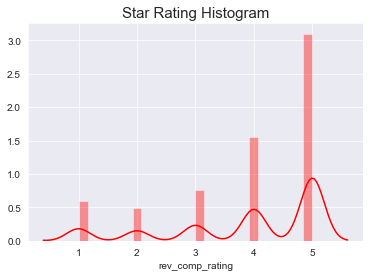

In [5]:
sns.set_style("darkgrid")
sns.distplot(start_reviews_df['rev_comp_rating'],norm_hist=False,color='red')
plt.title('Star Rating Histogram',fontsize=15);
# sns.set(font_scale=1); #used to increate the size of all fonts

Bar chart of value counts for star ratings:

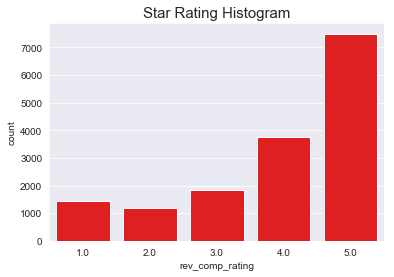

In [6]:
sns.countplot(start_reviews_df['rev_comp_rating'],color='red')
plt.title('Star Rating Histogram',fontsize=15);
# sns.set(font_scale=1)

__3. Avg star rating for businesses__

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


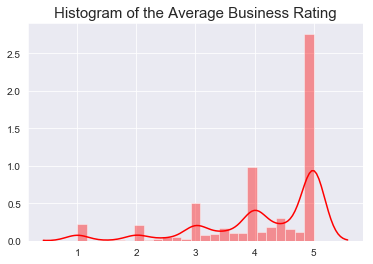

In [7]:
sns.distplot(start_reviews_df.groupby(['rev_company_name']).mean(),color='red')
plt.title('Histogram of the Average Business Rating',fontsize=15);

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


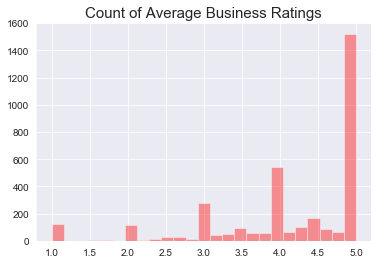

In [8]:
sns.distplot(start_reviews_df.groupby(['rev_company_name']).mean(),color='red',kde=False)
plt.title('Count of Average Business Ratings',fontsize=15);

Ok, now that we look at these some of them have the key words where we know we will not have scraped any more data from them, such as: __'CLOSED'__ and __'Moved'__. So, first things first, lets drop those. But while we're at it, lets __drop the businesses that have less than 2 reviews__.

We use a lambda function applied as a filter on the DataFrame which is grouped by the reviewed company name--the value we need to occur more than once.

In [9]:
reviews_filtered_df = start_reviews_df.groupby('rev_company_name').filter(lambda x: len(x) > 1)
reviews_filtered_df.reset_index(drop=True,inplace=True)

In [10]:
users_filter = start_reviews_df.groupby('userUrl').filter(lambda x: len(x) > 1)
users_filter.reset_index(drop=True,inplace=True)

In [11]:
reviews_filtered_df.rev_company_name.value_counts()[::-1][:10]

Ketanga Fitness Retreats             2
Rockaway Love                        2
Extra Pirouette                      2
Opal Yoga                            2
Equinox Dartmouth                    2
Always Club                          2
The Sporting Club at the Bellevue    2
Live Fit - CLOSED                    2
Peace Love Yoga                      2
Lolë - CLOSED                        2
Name: rev_company_name, dtype: int64

In [12]:
users_filter.userUrl.value_counts()[::-1][:10]

https://www.yelp.com/user_details?userid=v-3EpmxLx1qkjEd4VVhqlQ    2
https://www.yelp.com/user_details?userid=WqNp8IQQ3VI9q6Q7Vxb6Dg    2
https://www.yelp.com/user_details?userid=Ac42wklm5MBK_OECPl788Q    2
https://www.yelp.com/user_details?userid=xmsXrnl31Xq_cYjCYQ8Qvg    2
https://www.yelp.com/user_details?userid=xZwqYHzKw0_qWYJOJsECpg    2
https://www.yelp.com/user_details?userid=GsvmUaxqoC2-A21L7KDsrg    2
https://www.yelp.com/user_details?userid=UWNnAxq2rJXz9tyFw-ipbQ    2
https://www.yelp.com/user_details?userid=iyukfz3jxAEmPa-ercM3IQ    2
https://www.yelp.com/user_details?userid=_No-WDidAL3Ttpa5KzE5Mw    2
https://www.yelp.com/user_details?userid=dIIqM16tcnoE_LCznbu-Mg    2
Name: userUrl, dtype: int64

Ok, so above we can see that the last 10 values for the DataFrame are **_all_ above 1**.

In [13]:
reviews_filtered_df[reviews_filtered_df['rev_company_name']=='Las Vegas Athletic Club']

,comapny_source,company_loc,rev_comp_rating,rev_comp_reviews,rev_comp_url,rev_company_name,userUrl
1931,New York Sports Clubs,"2655 Maryland Pkwy Las Vegas, NV 89109",1.0,would have loved the opportunity to actually v...,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=QtpBG...
1958,New York Sports Clubs,"2655 Maryland Pkwy Las Vegas, NV 89109",4.0,Did I just step in a time machine back to the ...,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=YttDg...
6487,Crank Indoor Cycling Studio,"9065 S Eastern Ave Las Vegas, NV 89123",4.0,No complaints I like the classes they offer.....,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=d2HNq...
10676,Dance Manhattan,"2655 Maryland Pkwy Las Vegas, NV 89109",2.0,Last day in Vegas started feeling fat. Went t...,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=iQ_Bo...
13011,Lululemon Athletica,"9065 S Eastern Ave Las Vegas, NV 89123",1.0,I have been a member for YEARS. I just walked...,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=B8JUQ...
13083,Crunch - Bushwick,"1725 N Rainbow Blvd Las Vegas, NV 89108",1.0,The trainers here are horrible. They have no s...,https://www.yelp.com/biz/las-vegas-athletic-cl...,Las Vegas Athletic Club,https://www.yelp.com/user_details?userid=mxD9I...


So, above we can see that there are multiple studios/gyms outside nyc and others that have closed or moved. However, becuse we are doing Item-Item we will keep these for now to help with our users ratings. One thing to consider is that we will not use these if we include location in one of our models. Further, when we give recommendations these will be dropped.

In [14]:
print(f'shape before dropping rows: {start_reviews_df.shape}',
      f'shape after: {reviews_filtered_df.shape}',sep='\n........ YAS :) .......\n')

shape before dropping rows: (15722, 7)
........ YAS :) .......
shape after: (13637, 7)


In [15]:
print(f'shape before dropping rows: {start_reviews_df.shape}',
      f'shape after: {users_filter.shape}',sep='\n........ YAS :) .......\n')

shape before dropping rows: (15722, 7)
........ YAS :) .......
shape after: (15722, 7)


__Numer of reviews for each business:__

In [16]:
reviews_filtered_df.rev_company_name.value_counts()[:10]
# users_filter.rev_company_name.value_counts()[:10] #these are exactly the same

New York Sports Clubs             506
Physique 57                       110
Peloton                            96
Yoga to the People                 92
Mile High Run Club                 86
New York Sports Clubs - CLOSED     81
Pop Physique                       79
305 Fitness                        72
Brooklyn Boulders                  67
Fhitting Room                      67
Name: rev_company_name, dtype: int64

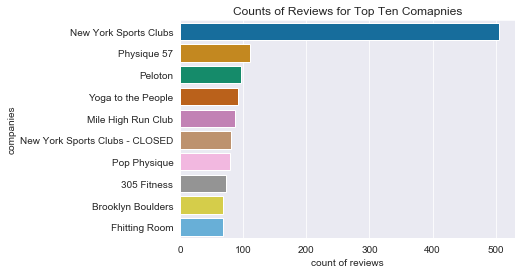

In [17]:
ax = sns.barplot(y=reviews_filtered_df.rev_company_name.value_counts().index[:10],
            x=reviews_filtered_df.rev_company_name.value_counts().values[:10],palette='colorblind')
plt.title('Counts of Reviews for Top Ten Comapnies',fontsize=12)
ax.set(xlabel='count of reviews', ylabel='companies')
sns.set(font_scale=1);
# ax.savefig("review_count_top_10.png")

__Distribution of the review counts:__

We can see that the distribution has a heavily __negative skew__. This is somehting we will need to deal with in later on, either with __over/under sampling or transforming__ our distribution.

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


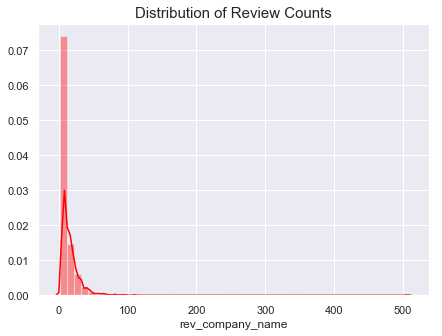

In [18]:
plt.figure(figsize=(7,5))
sns.distplot(reviews_filtered_df.rev_company_name.value_counts(),color='red')
plt.title('Distribution of Review Counts',fontsize=15);

__Location Distributions__: 

Here we will break up each neighborhood into a category and 

__Users averge Ratings and Distributions__:


rating distribution by user (on avg how many reviewrs did each user leave). So, due to us doing collaborative fitering we do not need each user to have left multiple reviews, but we do need them to have left one. Good for us that the majority of people left 2 or more.

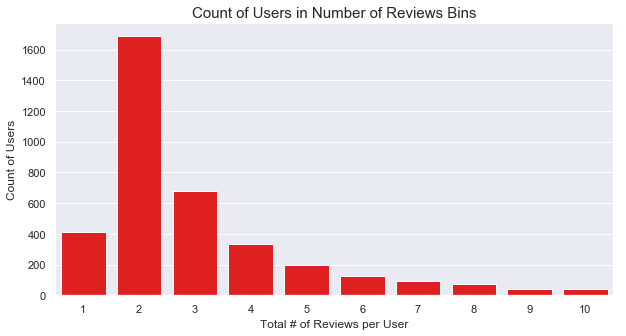

In [19]:
plt.figure(figsize=(10,5))
data = reviews_filtered_df.groupby('userUrl').count().rev_company_name.value_counts()[:10]
ax = sns.barplot(x=data.index, y=data.values,color='red')
plt.title('Count of Users in Number of Reviews Bins',fontsize=15)
plt.xlabel('Total # of Reviews per User')
plt.ylabel('Count of Users');
# plt.setp(ax.get_xticklabels()[:17], rotation=90);

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


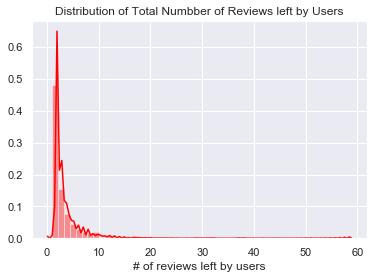

In [20]:
sns.distplot(reviews_filtered_df.groupby('userUrl').count()['rev_company_name'],color='red')
plt.xlabel('# of reviews left by users')
plt.title('Distribution of Total Numbber of Reviews left by Users');

#### Below the same graphs for the df with the filtered out users:

/Users/elenasm7/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


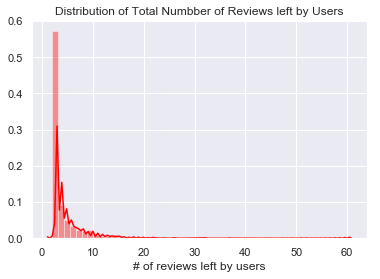

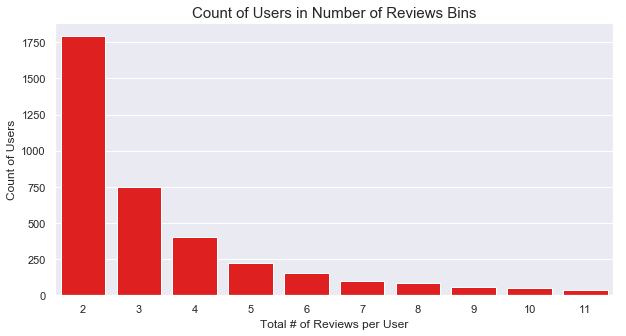

In [21]:
sns.distplot(users_filter.groupby('userUrl').count()['rev_company_name'],color='red')
plt.xlabel('# of reviews left by users')
plt.title('Distribution of Total Numbber of Reviews left by Users');

plt.figure(figsize=(10,5))
data = users_filter.groupby('userUrl').count().rev_company_name.value_counts()[:10]
ax = sns.barplot(x=data.index, y=data.values,color='red')
plt.title('Count of Users in Number of Reviews Bins',fontsize=15)
plt.xlabel('Total # of Reviews per User')
plt.ylabel('Count of Users');
# plt.setp(ax.get_xticklabels()[:17], rotation=90);

In [22]:
#pickle this DataFrame
reviews_filtered_df.to_pickle("Data/filtered_data_2.pkl")
users_filter.to_pickle("Data/filtered_user_data.pkl")

### Dealing with class Imbalance issues:

If we look at the distributions above we can see that some users appear more frequently than others, but also our star ratings are positively skewed. 

In the nect few cells we will try address this issue with a few separate approaches: 

- under sampling
- over sampling using SMOTE (or Synthetic Minorty Over-sampling Technique)

Typically we would go with the first option, so that we are not creating data.

In [ ]:
def in_nyc(x):
    if 'NY' in x:
        return 1
    else: 
        return 0 

reviews_filtered_df['in_NYC'] = reviews_filtered_df.company_loc.apply(lambda x: in_nyc(x))
reviews_filtered_df = reviews_filtered_df[reviews_filtered_df.in_NYC == 1].drop(['in_NYC'],axis=1).reset_index(drop=True)
